# Neighborhood Demo
Plots pseudocolor points to demonstrate effects of different values of $\sigma_i$ on the computed $p_{j | i}$ values

1. Original 3D space with swiss roll dataset
2. t-SNE 2D space

In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.manifold import TSNE

In [4]:
from utils import conditional_probabilities, entropy

In [26]:
data, colors = datasets.make_swiss_roll(n_samples=5000,
                                        noise=0.0,
                                        random_state=None)

# 1. Original 3D space

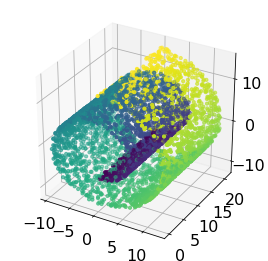

In [27]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(data[:, 0],
            data[:, 1],
            data[:, 2],
            c=colors,
            s=10)

In [39]:
indices = [4153, data.shape[0] -1]

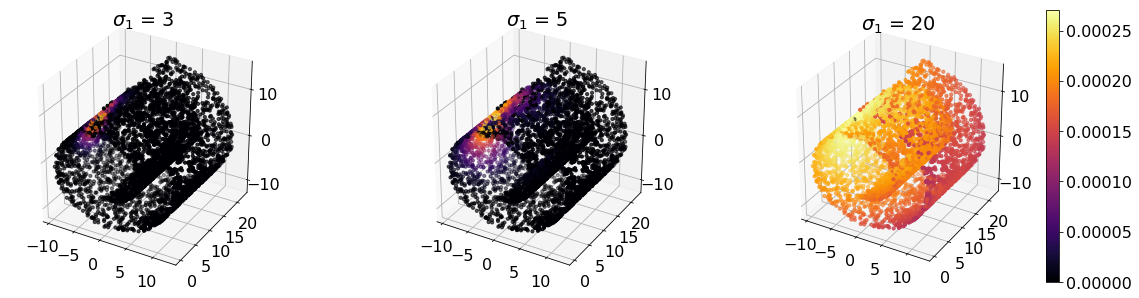

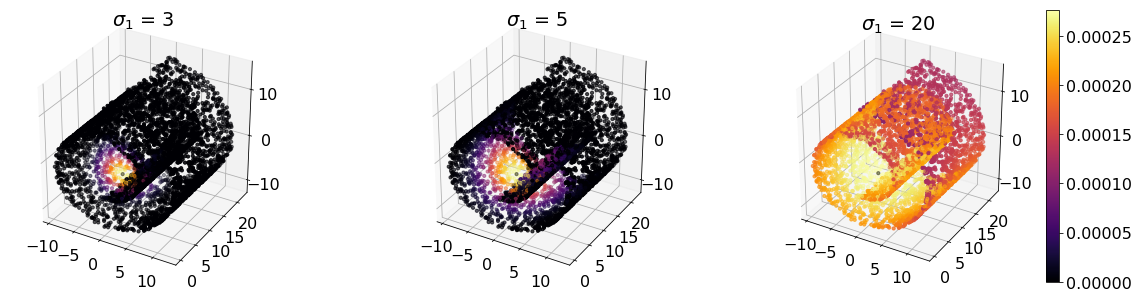

In [52]:
sigmas = [3, 5, 20]
for i in indices:
    fig = plt.figure(figsize=(20, 5))

    for idx, sigma in enumerate(sigmas):
        ax = fig.add_subplot(1, 3, idx + 1, projection='3d')
        p_jis = conditional_probabilities(data, i, sigma)

        sc = ax.scatter(data[:, 0],
                        data[:, 1],
                        data[:, 2],
                        c=p_jis,
                        cmap='inferno',
                        s=10)

        ax.set_title(r'$\sigma_1$ = %.0f' % sigma)
        ax.axis('square')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    cax = plt.colorbar(sc)

## 2. 2D version

In [43]:
tsne = TSNE(n_components=2)
tsne_transform = tsne.fit_transform(data)

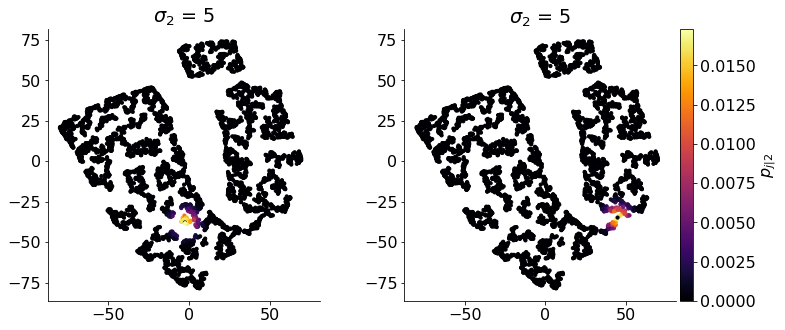

In [51]:
sigma = 5.
fig = plt.figure(figsize=(12, 5))
for idx, i in enumerate(indices):
    ax = fig.add_subplot(1, 2, idx + 1)
    p_j2s = conditional_probabilities(tsne_transform, i, sigma)
    
    sc = ax.scatter(tsne_transform[:, 0],
                    tsne_transform[:, 1],
                    c=p_j2s,
                    cmap='inferno',
                    s=10)

    ax.set_title(r'$\sigma_2$ = %.0f' % sigma)
    ax.axis('square')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cax = plt.colorbar(sc, cax=cax)
cax.set_label(r'$p_{j|2}$')